In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from numpy.linalg import inv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/2018-19 : ML/4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
X = data['Size']
Y = data['Rent']
thetas_0 = []
thetas_1 = []
costs = []

In [22]:
m = len(X)
epoch = 50
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 0

In [23]:
for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  theta_1 = theta_1 - learning_rate * (temp_1) / m
  thetas_0.append(theta_0)
  thetas_1.append(theta_1)
  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

In [24]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

0.007875489017113636 40.574629044978444


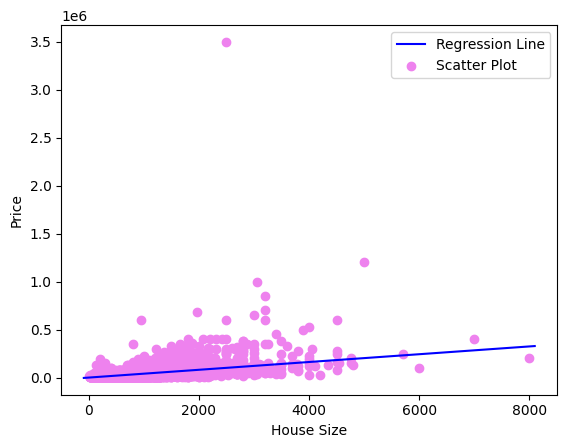

In [25]:
plt.plot(x, y, color='blue', label='Regression Line')
plt.scatter(X, Y, c = "violet", label = 'Scatter Plot')

print(theta_0, theta_1)

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
def loss(a, b):
    return 1/len(X)*(np.sum((a*X + b - Y)**2))

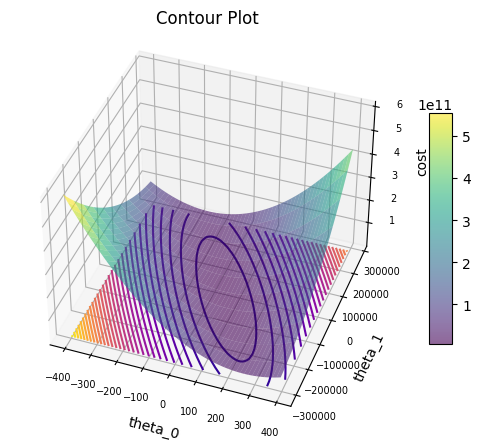

In [27]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")

a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b)

zs = np.array([loss(a, b) for a, b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

surf = ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3, edgecolor='none', alpha=0.6)

contour = ax.contour(A, B, loss_vals, 30, cmap="plasma", offset=0)

ax.view_init(40, 290)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost', rotation="vertical")
ax.set_title('Contour Plot')

plt.tick_params(axis='both', which='major', labelsize=7)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()